In [1]:
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
import math

In [2]:
from nltk.corpus import reuters
from nltk.corpus import wordnet

In [3]:
reuters_words = [w.lower() for w in reuters.words()]
words = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words]

In [4]:
words_1 = [w for (w, c) in counts]
counts_1 = [c for (w, c) in counts]

In [5]:
count_rank = ss.rankdata([c for (w, c) in counts])
count_rank

array([ 18567. ,  13183.5,  23206. , ...,  28664. ,  16537.5,  16537.5])

In [6]:
counts_ranked = zip(words_1, counts_1, count_rank)
counts_ranked[100:110]

[(u'shopwell', 2, 13183.5),
 (u'sedi', 1, 5513.0),
 (u'adoped', 1, 5513.0),
 (u'tulis', 2, 13183.5),
 (u'18th', 1, 5513.0),
 (u'menlo', 1, 5513.0),
 (u'reiners', 5, 19949.0),
 (u'farmlands', 4, 18567.0),
 (u'nonsensical', 1, 5513.0),
 (u'elisra', 1, 5513.0)]

In [7]:
counts_sorted = sorted(counts_ranked, key=lambda (w, c, r) : r)
counts_sorted[20000:20010]

[(u'packer', 5, 19949.0),
 (u'ucu', 5, 19949.0),
 (u'antar', 5, 19949.0),
 (u'ultra', 5, 19949.0),
 (u'kra', 5, 19949.0),
 (u'regan', 5, 19949.0),
 (u'leaseback', 5, 19949.0),
 (u'bildner', 5, 19949.0),
 (u'chartering', 5, 19949.0),
 (u'transparency', 5, 19949.0)]

In [8]:
L = len(counts_sorted)

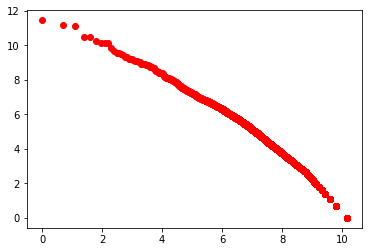

In [9]:
plt.plot([math.log(L-r+1) for (w, c, r) in counts_sorted], [math.log(c) for (w, c, r) in counts_sorted], 'ro')

In [10]:
import numpy as np

In [12]:
# generate x and y
x = [math.log(L-r+1) for (w, c, r) in counts_sorted]
y = [math.log(c) for (w,c,r) in counts_sorted]
X = np.array(x)
Y = np.array(y)
A = np.vstack([X, np.ones(len(X))]).T
Y_ = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y_)
print(alpha)

[[ -1.59893073]
 [ 16.37719998]]


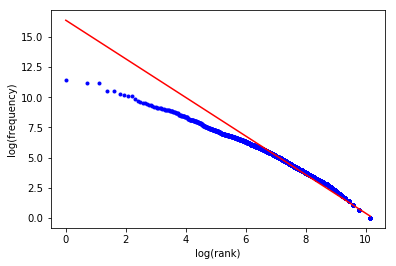

In [13]:
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()